In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['savefig.dpi'] = 250



data_type = 'float32'

# this line forces theano to use the GPU and should go before importing cell2location
os.environ["THEANO_FLAGS"] = 'device=cuda0,floatX=' + data_type + ',force_device=True'

sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/BayraktarLab/cell2location/')
sys.path.insert(1, '/nfs/team205/vk7/sanger_projects/cell2location_dev/')

import cell2location

from matplotlib import rcParams
import seaborn as sns
import pickle

# silence scanpy that prints a lot of warnings
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'In file included from /tmp/try_flags_norb1tn5.c:4:0:\n/usr/include/cudnn.h:63:10: fatal error: driver_types.h: No such file or directory\n #include "driver_types.h"\n          ^~~~~~~~~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda0: Tesla V100-SXM2-32GB (0000:62:00.0)


In [7]:
results_folder_paper = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_viseum_snrna/'

r = {'run_name': 'CoLocationModelNB4E6V2_59clusters_14968locations_12809genes_n_comb50_mean_var5_inferred_30k'}
sp_data_file = results_folder_paper + r['run_name']+'/sp.h5ad'
adata_vis_paper_full = anndata.read(sp_data_file)

In [8]:
results_folder_original = '/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_viseum_snrna/'

r = {'run_name': 'LocationModelLinearDependentWMultiExperiment_65clusters_14968locations_12807genes_n_comb50_mean_var5_inferred_30k'}
sp_data_file = results_folder_original + r['run_name']+'/sp.h5ad'
adata_vis_original = anndata.read(sp_data_file)

In [25]:
sp_data_file

'/nfs/team205/vk7/sanger_projects/cell2location_paper/notebooks/selected_results/mouse_viseum_snrna/LocationModelLinearDependentWMultiExperiment_65clusters_14968locations_12807genes_n_comb50_mean_var5_inferred_30k/sp.h5ad'

In [13]:
def select_slide(adata, s, s_col='sample'):
    r""" Select data for one slide from the spatial anndata object.

    :param adata: Anndata object with multiple spatial samples
    :param s: name of selected sample
    :param s_col: column in adata.obs listing sample name for each location
    """

    slide = adata[adata.obs[s_col].isin([s]), :]
    s_keys = list(slide.uns['spatial'].keys())
    s_spatial = np.array(s_keys)[[s in k for k in s_keys]][0]

    slide.uns['spatial'] = {s_spatial: slide.uns['spatial'][s_spatial]}

    return slide

In [15]:
adata_vis_paper.obs['sample']

spot_id
ST8059051_AAACAAGTATCTCCCA-1    ST8059051
ST8059051_AAACAGAGCGACTCCT-1    ST8059051
ST8059051_AAACCGGGTAGGTACC-1    ST8059051
ST8059051_AAACCGTTCGTCCAGG-1    ST8059051
ST8059051_AAACCTAAGCAGCCGG-1    ST8059051
                                  ...    
ST8059051_TTGTTAGCAAATTCGA-1    ST8059051
ST8059051_TTGTTCAGTGTGCTAC-1    ST8059051
ST8059051_TTGTTGTGTGTCAAGA-1    ST8059051
ST8059051_TTGTTTCACATCCAGG-1    ST8059051
ST8059051_TTGTTTCCATACAACT-1    ST8059051
Name: sample, Length: 2409, dtype: category
Categories (1, object): ['ST8059051']

In [16]:
adata_vis_paper = select_slide(adata_vis_paper_full, 'ST8059048')
adata_vis_original = select_slide(adata_vis_original_full, 'ST8059048')

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


In [20]:
cluster_components = {

 'Astro_THAL_med': ['Astro_4', 'Astro_10'],
 'Astro_HYPO': ['Astro_3', 'Astro_6'],
 'Astro_AMY': ['Astro_1', 'Astro_5'],
 'Astro_CTX': ['Astro_2', 'Astro_9'],
 'Astro_HPC': ['Astro_11', 'Astro_12'],
 'Astro_AMY_CTX': ['Astro_8', 'Astro_13'],
 'Astro_WM': ['Astro_7', 'Astro_16'],
 'Astro_THAL_lat': ['Astro_0'],
 'Astro_THAL_hab': ['Astro_15'],
 'Astro_STR': ['Astro_14'],
}

cluster_components_double = {k: v for k, v in cluster_components.items() if len(v) == 2}
cluster_components_single = {k: v for k, v in cluster_components.items() if len(v) == 1}

In [18]:
def plot(adata, cell_type, ax=None):
    if ax is None:
        ax = plt.gca()
    sc.pl.spatial(adata, img_key = "hires", cmap='magma',
              title='',
              color=f'mean_nUMI_factors{cell_type}', size=1.3,
              alpha_img=0.85, vmin=0, vmax='p99.7',#vmax=5,#vmax=5000, #vmax=4,
              ncols=5,
              gene_symbols='SYMBOL', frameon=False, wspace=0.26,
              ax=ax, show=False)
    return ax

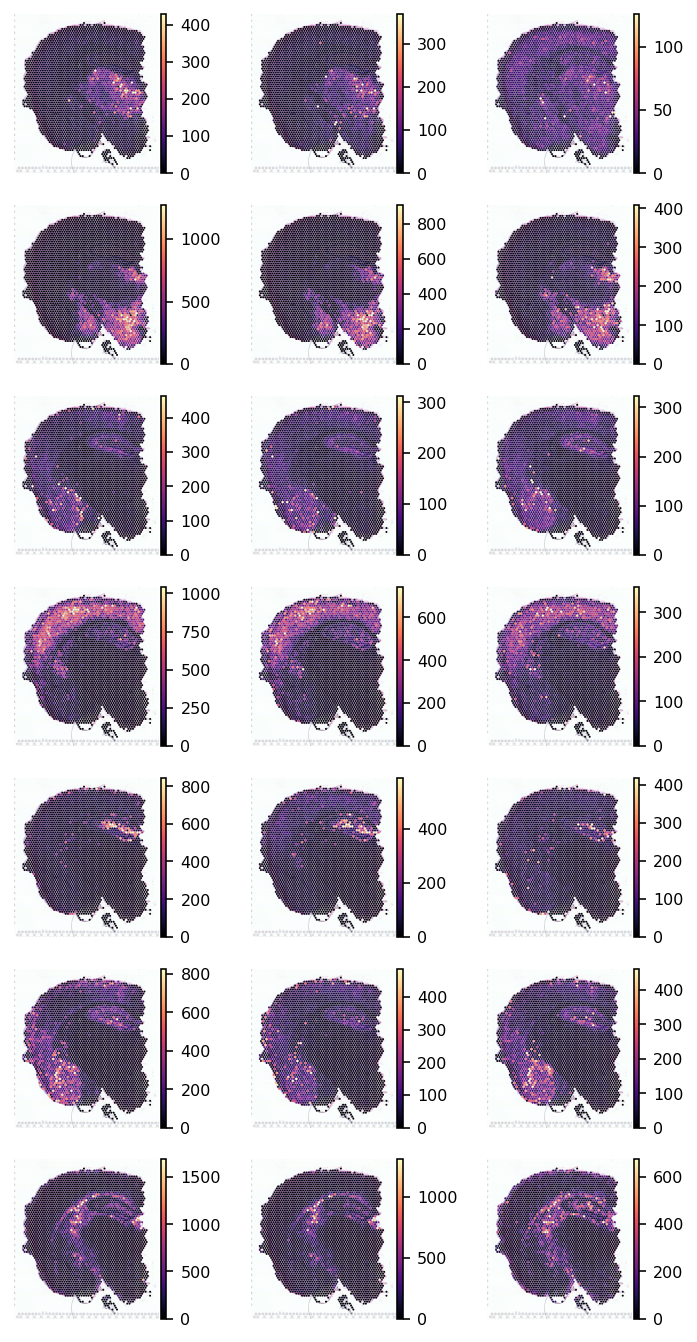

In [19]:
with matplotlib.rc_context({'font.size': 8}):
    fig, axs = plt.subplots(7, 3, figsize=(6, 12), subplot_kw={'aspect': 'equal'})
    for num, i in enumerate(cluster_components_double.items()):
        key, value = i
        plot(adata_vis_paper, key, axs[num][0]);
        plot(adata_vis_original, value[0], axs[num][1]);
        plot(adata_vis_original, value[1], axs[num][2]);

In [89]:
fig.savefig('figures/FigS13/FigS13A_dual_clusters.pdf')

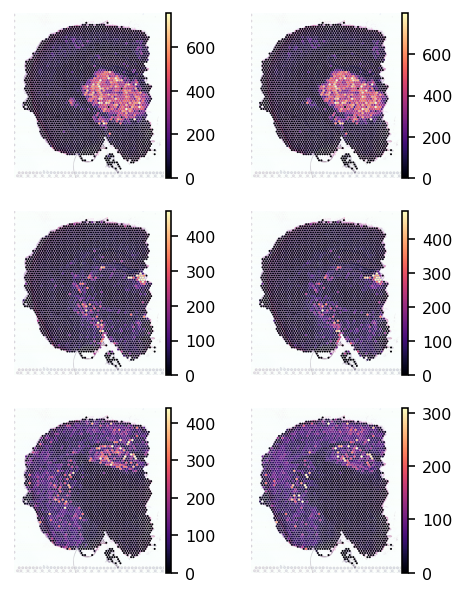

In [95]:
with matplotlib.rc_context({'font.size': 8}):
    fig, axs = plt.subplots(3, 3, figsize=(6, 12*3/7), subplot_kw={'aspect': 'equal'})
    for num, i in enumerate(cluster_components_single.items()):
        key, value = i
        plot(adata_vis_paper, key, axs[num][0]);
        plot(adata_vis_original, value[0], axs[num][1]);
        axs[num][2].set_visible(False)

In [96]:
fig.savefig('figures/FigS13/FigS13A_single_clusters.pdf')

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


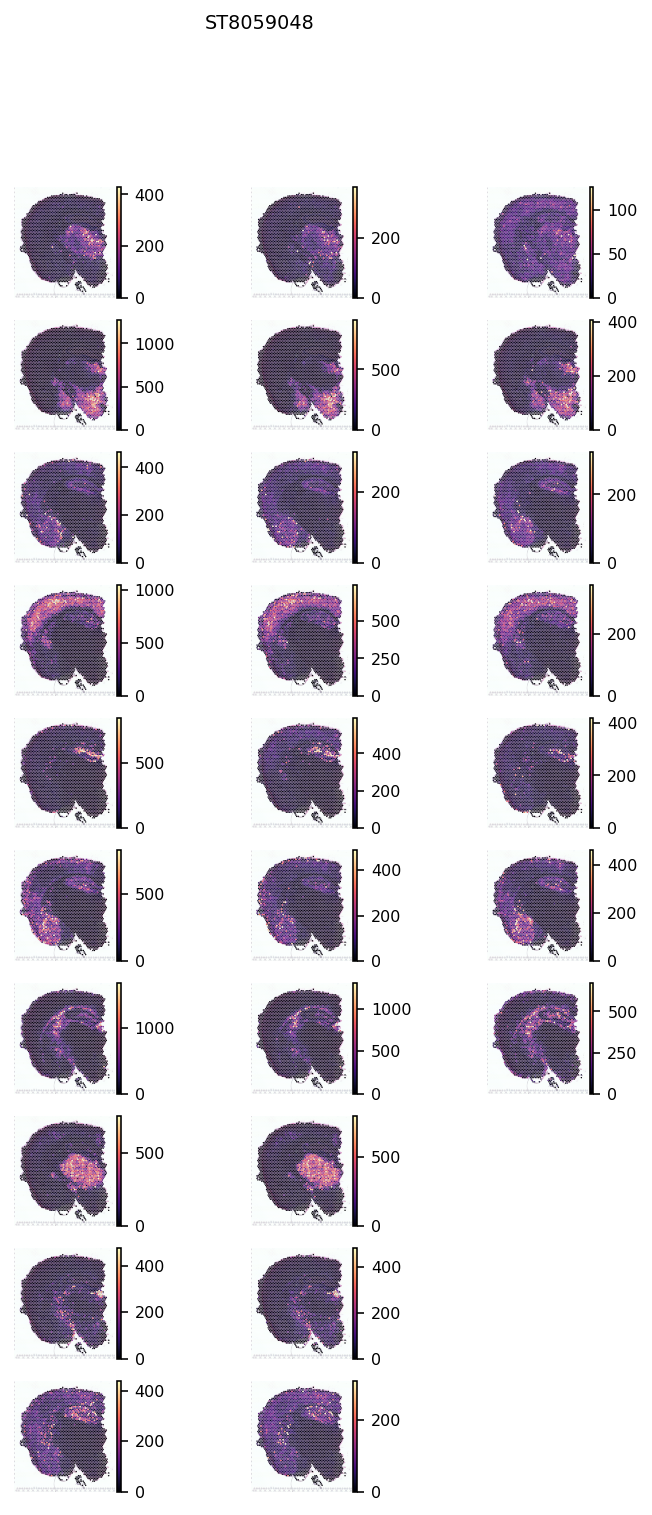

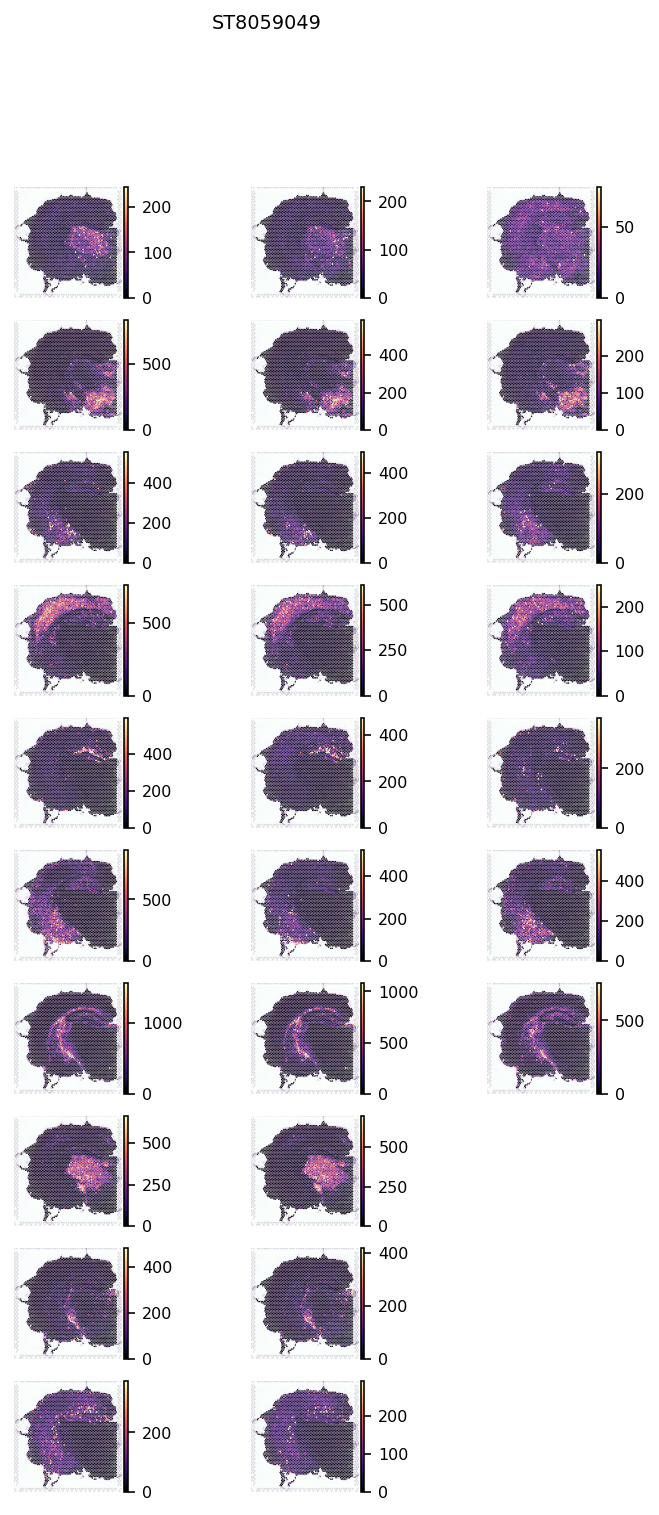

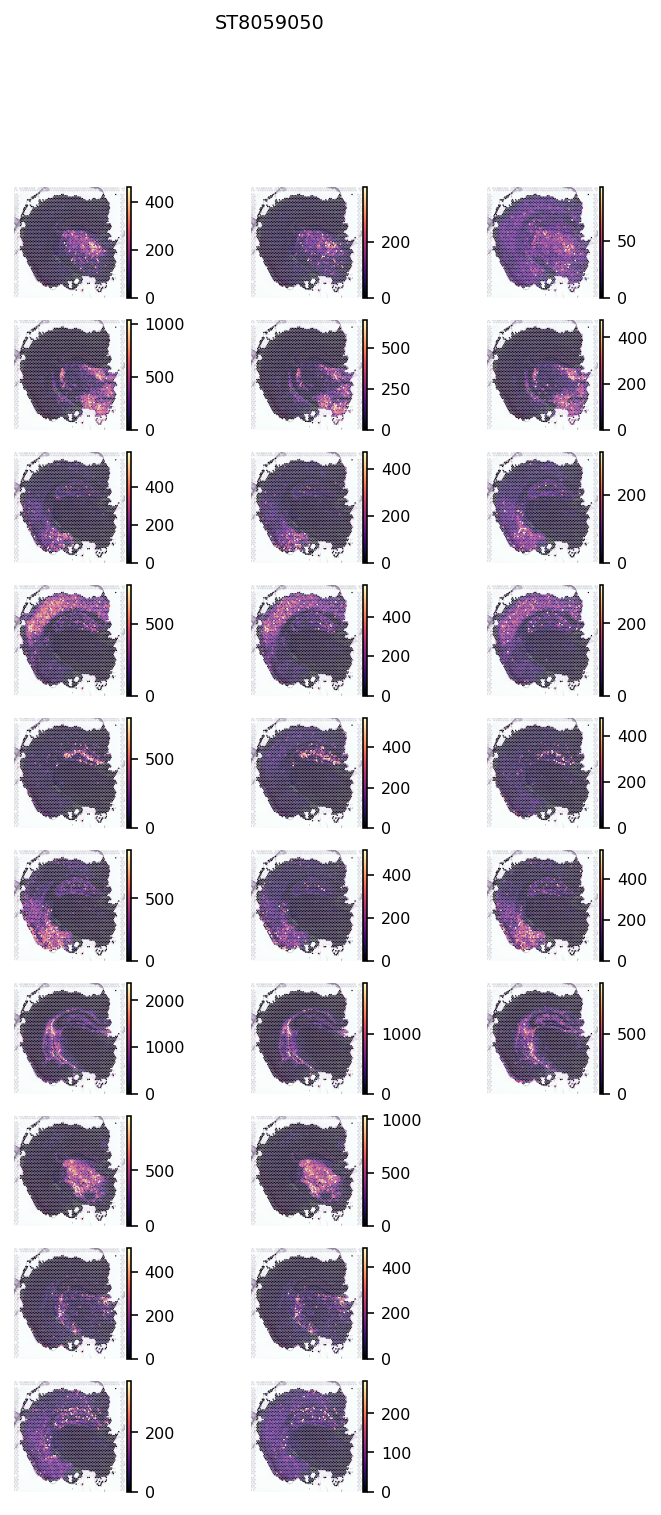

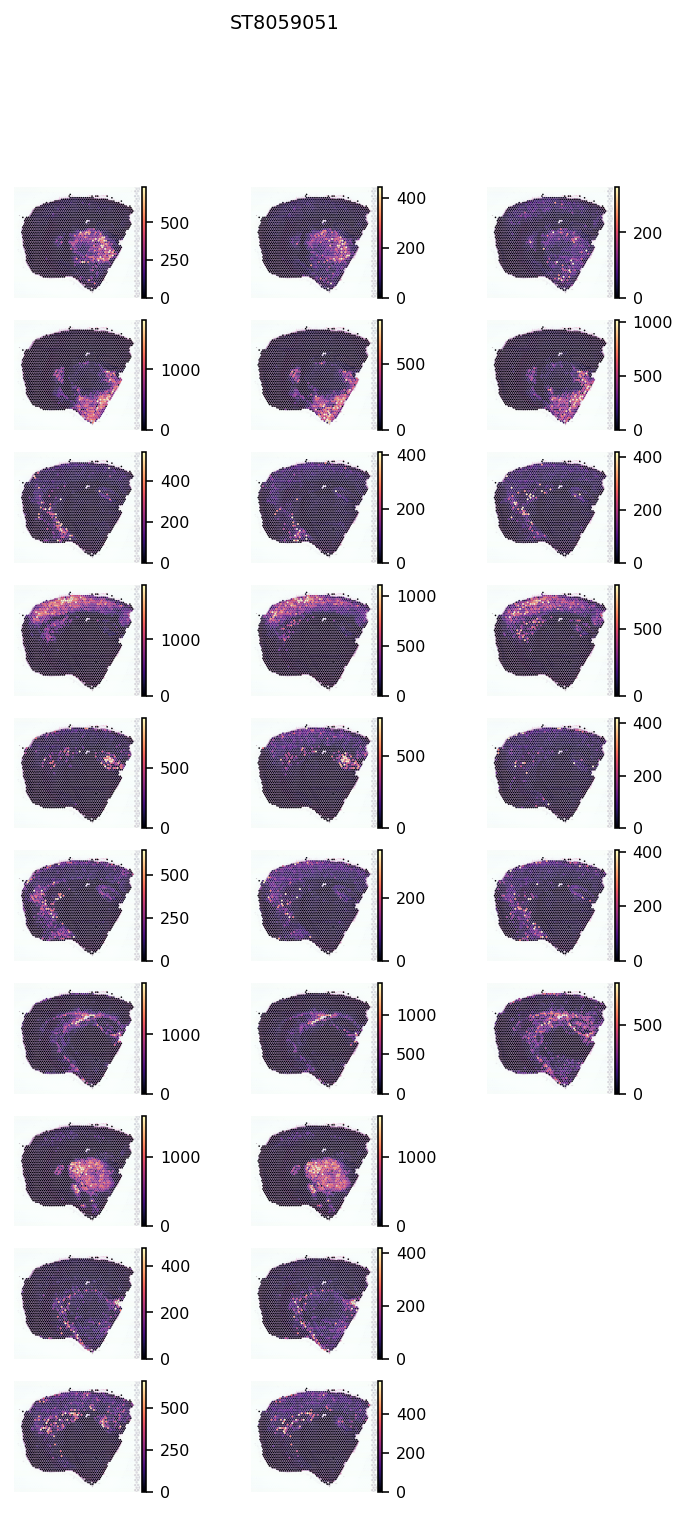

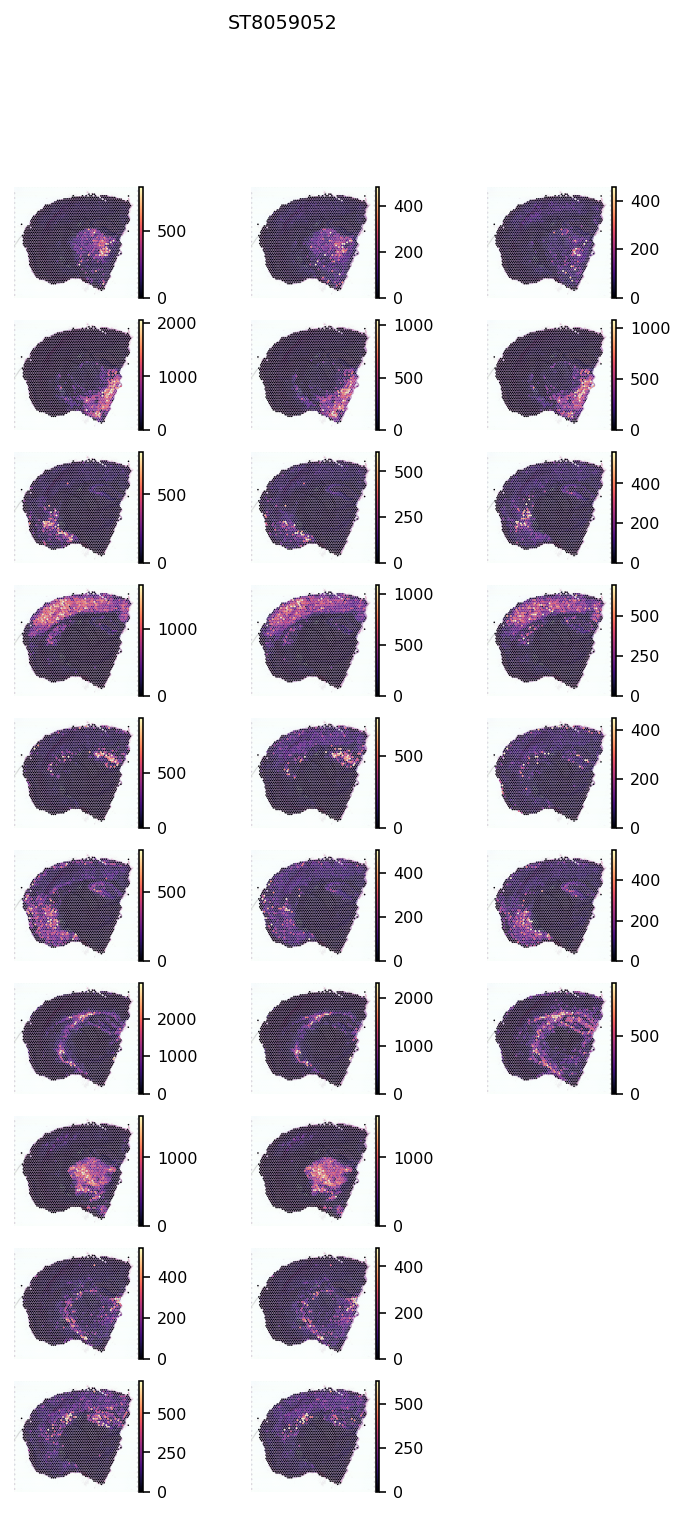

In [23]:
with matplotlib.rc_context({'font.size': 8}):
    for sample in adata_vis_paper_full.obs['sample'].unique():
        adata_vis_paper = select_slide(adata_vis_paper_full, sample)
        adata_vis_original = select_slide(adata_vis_original_full, sample)
        fig, axs = plt.subplots(10, 3, figsize=(6, 12), subplot_kw={'aspect': 'equal'})
        for num, i in enumerate(cluster_components.items()):
            key, value = i
            plot(adata_vis_paper, key, axs[num][0]);
            plot(adata_vis_original, value[0], axs[num][1]);
            if len(value) == 2:
                plot(adata_vis_original, value[1], axs[num][2]);
            else:
                axs[num][2].set_visible(False)
        fig.suptitle(sample)
        fig.show()

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


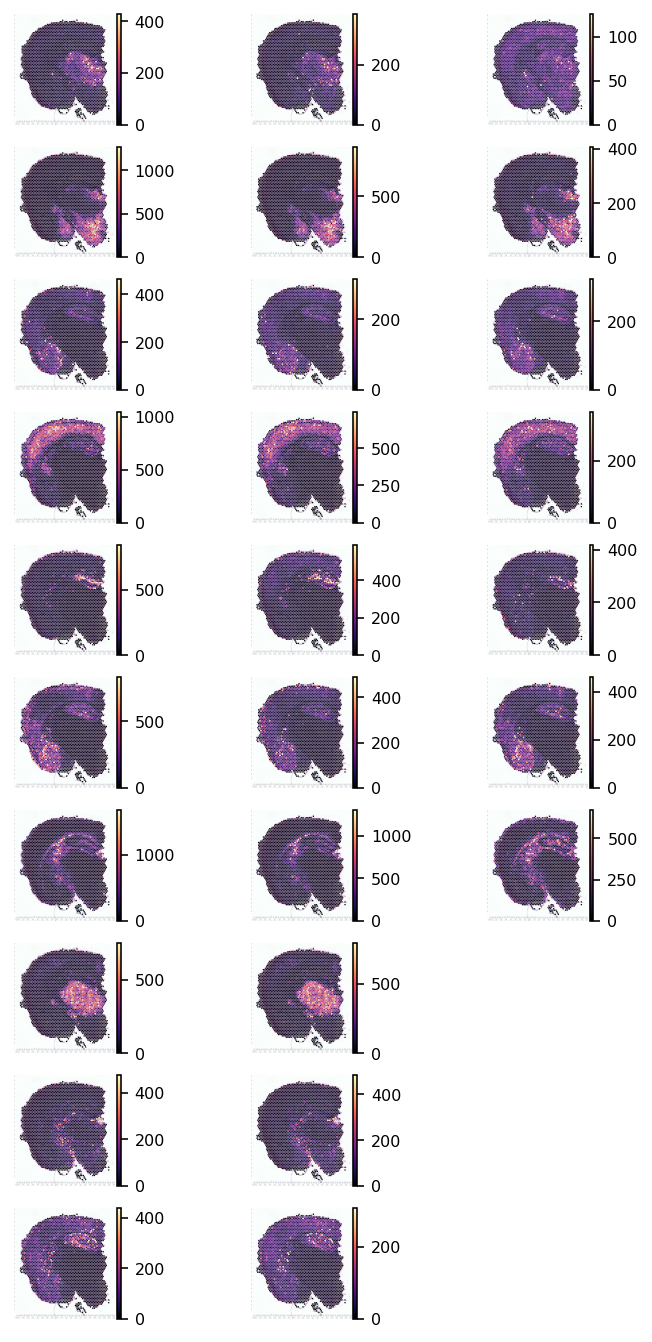

In [26]:
with matplotlib.rc_context({'font.size': 8}):
    adata_vis_paper = select_slide(adata_vis_paper_full, 'ST8059048')
    adata_vis_original = select_slide(adata_vis_original_full, 'ST8059048')
    fig, axs = plt.subplots(10, 3, figsize=(6, 12), subplot_kw={'aspect': 'equal'})
    for num, i in enumerate(cluster_components.items()):
        key, value = i
        plot(adata_vis_paper, key, axs[num][0]);
        plot(adata_vis_original, value[0], axs[num][1]);
        if len(value) == 2:
            plot(adata_vis_original, value[1], axs[num][2]);
        else:
            axs[num][2].set_visible(False)
    fig.savefig('figures/FigS13/FigS13_all_48.pdf')